# Programmieraufgabe II  ( 6+6+12+6 = 30 Punkte)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Teilaufgabe a:  Gradientenverfahren mit Armijo-Schrittweite (6 Punkte)

Implementieren Sie das Gradientenverfahren mit Armijo-Linesearch:

Als Input sollen übergeben werden: 

* eine Funktion $f$ sowie eine weitere Funktion $gradf$, die den Gradienten von $f$ berechnet,  
* ein Startwert $x_0$,
* eine Toleranz $tol > 0$ sowie die maximale Anzahl $itmax$ an Gradientenschritten, 
* die zwei Parameter $\beta$, $c$ für die Schrittweitenbestimmung nach Armijo sowie die maximale Anzahl $armijoitmax$ der dafür ausgeführten Iterationen.

Output soll eine Iterierte $x_{k^*}$ sein, die $\lVert \nabla f(x_{k^*}) \rVert < \epsilon$ erfüllt. Zusätzlich sollen Listen mit den Funktionswerten $(f(x_k))_k$ ("$fvals$") bzw. den Iterierten $(x_k)_k$ ("$xvals$") ausgegeben werden. 

Im Falle des Versagens des Algorithmus bzw. von Teilen des Algorithmus sollen entsprechende Fehlermeldungen ausgegeben werden.

In [4]:
def gradientdescent_armijo(f, gradf, x0, tol, c, beta, itmax, armijoitmax):
    
    ## to be filled in ## 
    
    return x, xvals, fvals

Testen Sie Ihre Implementierung an folgenden Beispielen (mit $x^*$ sind jeweils die bekannten Minima angegeben): 

* $f: \mathbb{R}^2 \rightarrow \mathbb{R}, (x_1, x_2) \mapsto 100(x_2 -x_1^2)^2 + (1-x_1)^2$, $x^* = (1,1)$.  
* $g: \mathbb{R}^{100} \rightarrow \mathbb{R}, x \mapsto \frac{1}{2} x^T A x - b^T x$, mit $b = Ax^*$, $x^* = (1,1,...,1)^T$. $A$ ist die $100 \times 100$-Matrix mit $4$en auf der Hauptdiagonale, $-1$ auf den beiden Nebendiagonalen und sonst Nulleinträgen.  
* $h: \mathbb{R} \rightarrow \mathbb{R}$, $x \mapsto exp(-1/x^2)$, $x^* = 0$.  

Plotten Sie dazu sowohl die Verläufe von $f(x_k)-f(x^*)$ als auch von $\lVert x_k - x^* \rVert_2$ (analog für $g$,$h$) für den Startwerten $x_0 = 0$ ($f$ und $g$) bzw. $x_0 = 1$ (für $h$).

## Teilaufgabe b: Gradientenverfahren mit konstanter Schrittweite (6 Punkte)

Implementieren Sie analog zu Teilaufgabe a) den Gradientenabstieg mit konstanter Schrittweite $\alpha$. 

In [3]:
def gradientdescent_const(f, gradf, x0, tol, alpha, itmax):
    
    ## to be filled in ## 
    
    return x, xvals, fvals


Vergleichen Sie das Konvergenzverhalten des Gradientenverfahrens mit konstanter Schrittweite mit Ihren Ergebnissen aus 
Teilaufgabe a). Verwenden Sie dazu dieselben drei Funktionen $f$, $g$ und $h$, die gleichen Startwerte und testen Sie Schrittweiten $\alpha \in \{ 0.5, 0.3, 0.1, 0.01, 0.005, 0.003, 0.002 \}$. Interpretieren Sie Ihr Ergebnis. 

## Teilaufgabe c: Gradientenverfahren vs. CG-Verfahren  (12 Punkte)

Implementieren Sie für eine positiv definite Matrix $A$, eine rechte Seite $b$ und einen Startwert $x_0$ den Gradientenabstieg mit exakter Schrittweite für die Lösung der linearen Gleichung $Ax = b$. Neben $A$ und $b$ sollen als Input eine Toleranz $tol$ für die Norm des Gradienten sowie eine maximale Anzahl $itmax$ von Gradientenschritten vorgegeben werden. 

Implementieren Sie analog dazu das CG-Verfahren für $Ax = b$ und vergleichen Sie die Konvergenzgeschwindigkeit des Gradientenverfahrens mit der des CG-Verfahrens anhand von $A$, $b$ aus Teilaufgabe a): Erstellen Sie dazu eine Graphik, in der Sie die Konvergenzgeschwindikeit aller vier Verfahren (Gradientenabstieg mit Armijo-Schrittweite, konstanter Schrittweite, optimaler Schrittweite und CG) gegenüberstellen.

Interpretieren Sie Ihr Ergebnis. Gehen Sie dabei auf die Konvergenzordnung des Gradientenverfahrens mit optimaler Schrittweite bzw. des CG-Verfahrens ein.

In [21]:
def gradientdescent_quadratic(A,b,x0,tol,itmax):
    
    ## to be filled in ##
    
    return x, xvals
def ska(x,y):
    return x.T.dot(y)
def mycg(A, b, x0, itmax,tol ):
    xvals = []
    i = 0
    ri = A.dot(x0)-b
    beta = 0
    xi = np.copy(x0)
    
    di = np.copy(-ri)#im ersten schritt di = -ri
    
    for _ in range(A.shape[0]):
        print(ri)
        xvals.append(xi)
        ri_norm_new = np.linalg.norm(ri)
        
        if (ri_norm_new < tol or i>itmax):
            print(i)
            break
          

        t = A.dot(di)
        
        alpha = (ri_norm_new*ri_norm_new)/ska(t, di)
        print(alpha)
        print(xi)
        xi = xi +alpha*di
        ri = ri +alpha*t

        ri_norm_old = ri_norm_new

        ri_norm_new = np.linalg.norm(ri)
        i += 1
    
    
        beta = (ri_norm_new*ri_norm_new)/(ri_norm_old*ri_norm_old)
        print(beta)
        di = -ri +beta*di
    
    
     
    
    return xi, xvals
    #return x,xvals 


A = np.array([[4,1],[1,3]])
b = np.array([1,2])
x0 = np.array([2,1])
res, xvals= mycg(A,b,x0,10, 0.001)
#print(res)
#print(np.matmul(A,res)-b)
#print(np.matmul(A,res))
#print(xvals)

[8 3]
0.22054380664652565
[2 1]
0.008771369374138607
[ 0.28096677 -0.74924471]
0.41220423412204243
[0.23564955 0.33836858]
1.5399981048016357e-30


In [6]:
## Vergleich der 4 Verfahren: ## 
A = np.array([[3,0,0],[0,2,0],[0,0,1]])
b = np.array([3,4,3])
x0 = np.array([9,-7,11])
res, xvals= mycg(A,b,x0,10, 0.001)
print(res)
print(np.matmul(A,res)-b)
print(xvals)

Sei nun $C = \begin{pmatrix} c & -1 \\-1 & c \end{pmatrix}$ mit $c > 1$ and $d = (0,0)^T$. Lassen Sie die Iterierten des Gradientenverfahrens mit optimaler Schrittweite bzw. des CG-Verfahrens (für die lineare Gleichung $Cx = d$) in einen Höhenlinienplot der Funktion $\phi(x) = \frac{1}{2} x^T C x - d^T x$ einzeichnen. Startwert soll für beide Verfahren $x_0 = (c,1)^T$ sein.

Variieren Sie $c$ und interpretieren Sie Ihr Ergebnis. Achten Sie dabei darauf, dass der Plot einen sinnvollen Ausschnitt der "Höhenlandschaft" von $f$ zeigt, sodass das Verhalten der Iteration erkennbar wird.

<function matplotlib.pyplot.show>

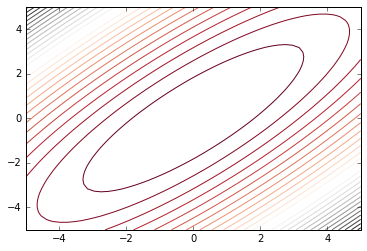

In [71]:
def phi(C, x1, x2):
    x = np.array([x1,x2])
    #print(x)
    return 0.5*np.dot(x.T,np.dot(C,x))
def h(C, X, Y):
    res = np.zeros_like(X)
    it = np.nditer(res, flags=['multi_index'],op_flags=['readwrite'])
    while not it.finished:
        it[0][...] = phi(C, X[it.multi_index[0]][it.multi_index[1]], Y[it.multi_index[0]][it.multi_index[1]])
        it.iternext()
    return res

c = 1.2

C = np.array([[c,-1],[-1,c]])

x = np.linspace(-5,5,50)
y = np.linspace(-5,5,50)

X, Y =np.meshgrid(x,y)

Z = h(C, X, Y)
#plt.contour(X, Y, Z, colors="black")
plt.contour(X, Y, Z, 30, cmap='RdGy')
plt.show

## Teilaufgabe d: Gauss-Newton Verfahren (6 Punkte)

Implementieren Sie das Gauss-Newton-Verfahren von Übungsblatt 4, Aufgabe 2. Für die Lösung der entsprechenden Least-Squares Probleme können Sie die unten angegebene Funktion $myleastsquares$ verwenden.

Input der Funktion $gaussnewton$ soll sein: 
* Funktion $f$ sowie eine Funktion $df$, die die Jacobi-Matrix von $f$ auswertet   
* Vektor $y$ 
* Starwert $x_0$ und Toleranz $tol$, derart, dass die Iteration abbricht, wenn $\lVert \nabla r(x) \rVert < tol$ erfüllt ist oder eine Maximalzahl $itmax$ von Iterationen erreicht ist

In [17]:
def myleastsquares(A,b):
    Q,R = np.linalg.qr(A)
    rhs = (np.transpose(Q)).dot(b)
    xmin = np.linalg.solve(R,rhs)
    return xmin 

def gaussnewton(f,df,y,x0,tol,itmax): 
    
    ## to be filled in ##
    
    return x, xvals
        

Testen Sie Ihre Implementierung anhand des Beispiels aus Aufgabe 2c von Übungsblatt 4. Erstellen Sie einen Plot, aus dem hervorgeht, welche Konvergenzordnung beobachtet werden kann.